# <center/> Comparison of Different Indices

https://www.gov.uk/government/publications/about-the-uk-house-price-index/comparing-house-price-indices-in-the-uk<br>
Source : https://ifs.org.uk/bns/bn146.pdf<br>
There are several major house price indices in the UK. These indices differ both in terms of what they are trying to measure and in terms of the data on which they are based. We focus on the following five indices, because they all seek to measure the price of housing using actual sales data and are relatively long-standing; hence, we can evaluate differences in trends
in the series over a longer period:<br/>
##TOC:
* [Indices produced by Halifax](#first-bullet)
* [Indices produced by the Nationwide Building Society](#second-bullet)
* [An index produced by LSL Property Services / Acadata (LSL Acad),which is based on Land Registry data.](#third-bullet)
* [The Land Registry house price index, which is based on a complete register of all residential sales in England and Wales](#forth-bullet)


In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

#### HALIFAX House Price Index Data <a class="anchor" id="first-bullet"></a>

In [2]:
#importing the halifax hpi data
df_halifax = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/halifax_HPI.xlsx')
df_halifax.head()

,Date,Price,Index
0,2019-01-01,223691,397.8
1,2019-02-01,236800,403.8
2,2019-03-01,233181,402.6
3,2019-04-01,236619,400.3
4,2019-05-01,237837,399.7


In [3]:
#describing the dataset(checking the statistical information)
df_halifax.describe()

,Price,Index
count,42.000000,42.000000
mean,252375.261905,434.535714
std,18242.371306,32.052357
min,223691.000000,397.800000
25%,237664.000000,406.275000
50%,250163.500000,430.650000
75%,262651.250000,453.150000
max,294845.000000,508.400000


We can see : <br/>1. The House Price Max is 294,845 and Min is 223,691 with a standard deviation of 18242.37 and mean as 252375.26<br/>2. Index Max is 508.4 and Min is 397.8 with a standard deviation of 32.052 and mean as 434.53

In [4]:
#checking for any null values
df_halifax.isna().sum()

Date     0
Price    0
Index    0
dtype: int64

In [5]:
#checking the data types of variables
df_halifax.dtypes

Date     datetime64[ns]
Price             int64
Index           float64
dtype: object

In [6]:
#to check the date range  
date_list = list(df_halifax['Date'])
print("The starting date of dataset is :",date_list[0])
print("The Ending date of dataset is :",date_list[-1])

The starting date of dataset is : 2019-01-01 00:00:00
The Ending date of dataset is : 2022-06-01 00:00:00


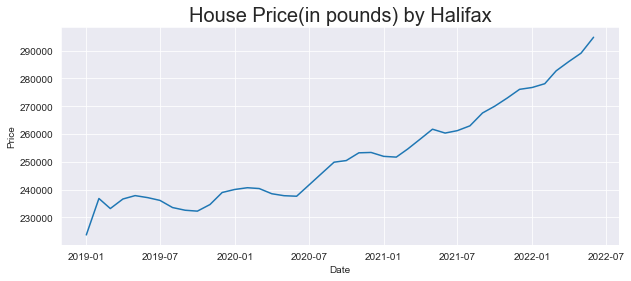

In [7]:
#Plotting the house price of halifax
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
sns.lineplot(data = df_halifax ,x='Date',y='Price')
plt.title("House Price(in pounds) by Halifax",fontdict={'fontsize': 20})
plt.show()

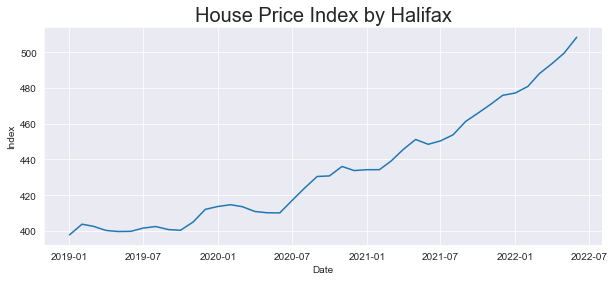

In [8]:
#Plotting the Index of halifax
plt.figure(figsize = (10,4))
sns.lineplot(data = df_halifax ,x='Date',y='Index')
plt.title("House Price Index by Halifax",fontdict={'fontsize': 20})
plt.show()

In [9]:
#calculating the percentage change in house price and index
df_halifax['%change_HPI'] =df_halifax['Index'].pct_change()
df_halifax['%change_Price'] =df_halifax['Price'].pct_change()
df_halifax.fillna(0,inplace=True)
df_halifax.head()

,Date,Price,Index,%change_HPI,%change_Price
0,2019-01-01,223691,397.8,0.000000,0.000000
1,2019-02-01,236800,403.8,0.015083,0.058603
2,2019-03-01,233181,402.6,-0.002972,-0.015283
3,2019-04-01,236619,400.3,-0.005713,0.014744
4,2019-05-01,237837,399.7,-0.001499,0.005148


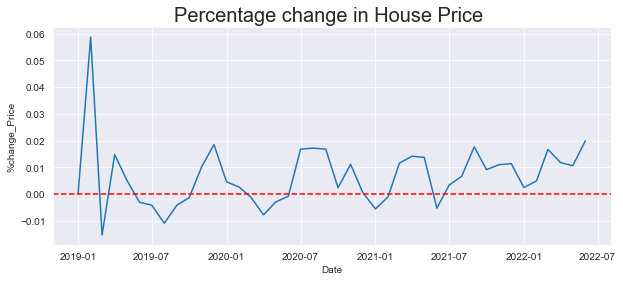

In [10]:
# plotting the percentage change in house prices
plt.figure(figsize = (10,4))
sns.lineplot(data=df_halifax,x='Date',y='%change_Price')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in House Price ",fontdict={'fontsize': 20})
plt.show()

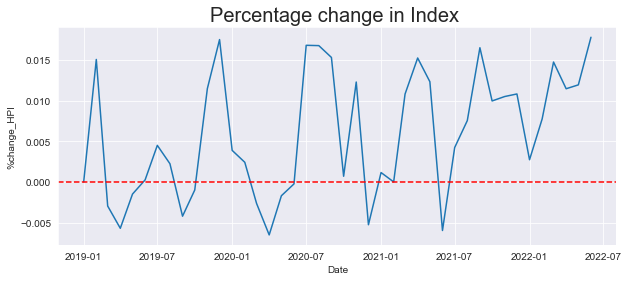

In [11]:
#plotting the percentage change in index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_halifax,x='Date',y='%change_HPI')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in Index ",fontdict={'fontsize': 20})
plt.show()

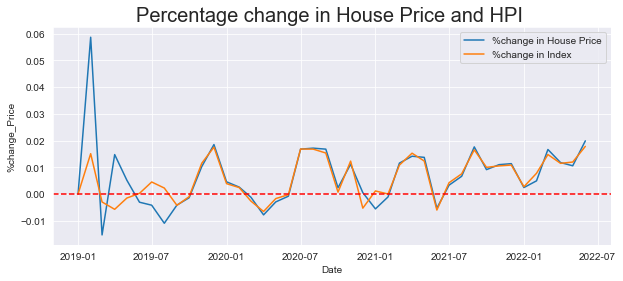

In [12]:
#plotting the percentage change together of both house price and Index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_halifax,x='Date',y='%change_Price',label='%change in House Price')
sns.lineplot(data=df_halifax,x='Date',y='%change_HPI',label='%change in Index')
plt.axhline(0, ls='--',c='red')
plt.legend()
plt.title("Percentage change in House Price and HPI ",fontdict={'fontsize': 20})
plt.show()

#### Nationwide House Price Index Data <a class="anchor" id="second-bullet"></a>

In [13]:
#importing nationwide data
df_nationwide = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/nationwide_prices.xls')
df_nationwide.head()

,Date,Average House Price,INDEX,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [14]:
#dropping non-required columns
df_nationwide = df_nationwide[['Date','Average House Price','INDEX']]
df_nationwide.head()

,Date,Average House Price,INDEX
0,1991-01-01,53051.721106,105.832511
1,1991-02-01,53496.798746,106.720393
2,1991-03-01,52892.861606,105.515603
3,1991-04-01,53677.435270,107.080744
4,1991-05-01,54385.726747,108.493710


In [15]:
##describing the dataset(checking the statistical information)
df_nationwide.describe()

,Average House Price,INDEX
count,379.000000,379.000000
mean,139109.281995,277.508143
std,64082.182943,127.837103
min,49601.664241,98.950016
25%,66378.483270,132.417977
50%,158572.967796,316.336115
75%,188502.181703,376.041697
max,271613.044812,541.838982


We can see : <br/> 1. The House Price Max is 271,613 and Min is 49,601 with a standard deviation of 64082.18 and mean as 139109.28<br/>2. Index Max is 541.83 and Min is 98.95 with a standard deviation of 127.83 and mean as 277.50

In [16]:
#checking for any null values
df_nationwide.isna().sum()

Date                   0
Average House Price    0
INDEX                  0
dtype: int64

In [17]:
#checking the data types of variables
df_nationwide.dtypes

Date                   datetime64[ns]
Average House Price           float64
INDEX                         float64
dtype: object

In [18]:
#to check the date range  
date_list = list(df_nationwide['Date'])
print("The starting date of dataset is :",date_list[0])
print("The Ending date of dataset is :",date_list[-1])

The starting date of dataset is : 1991-01-01 00:00:00
The Ending date of dataset is : 2022-07-01 00:00:00


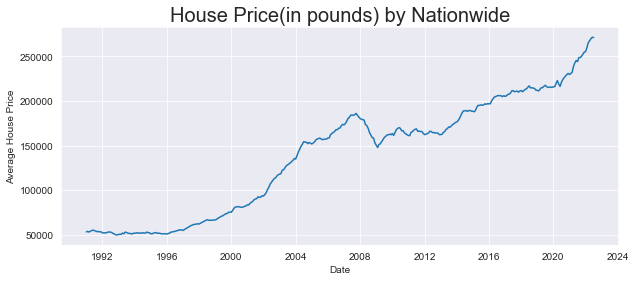

In [20]:
#Plotting the house price of nationwide
plt.figure(figsize = (10,4))
sns.lineplot(data = df_nationwide ,x='Date',y='Average House Price')
plt.title("House Price(in pounds) by Nationwide",fontdict={'fontsize': 20})
plt.show()

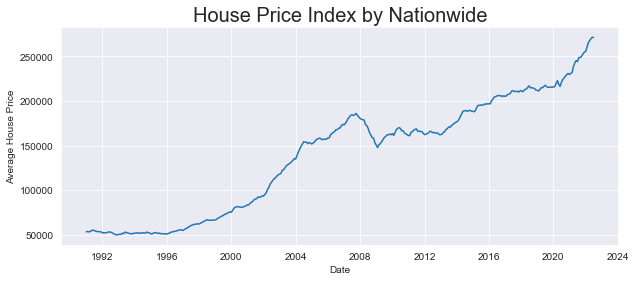

In [21]:
#Plotting the Index of Nationwide
plt.figure(figsize = (10,4))
sns.lineplot(data = df_nationwide ,x='Date',y='Average House Price')
plt.title("House Price Index by Nationwide",fontdict={'fontsize': 20})
plt.show()

In [22]:
#calculating the percentage change in house price and index
df_nationwide['%change_HPI'] =df_nationwide['INDEX'].pct_change()
df_nationwide['%change_Price'] =df_nationwide['Average House Price'].pct_change()
df_nationwide.fillna(0,inplace=True)
df_nationwide.head()

,Date,Average House Price,INDEX,%change_HPI,%change_Price
0,1991-01-01,53051.721106,105.832511,0.000000,0.000000
1,1991-02-01,53496.798746,106.720393,0.008390,0.008390
2,1991-03-01,52892.861606,105.515603,-0.011289,-0.011289
3,1991-04-01,53677.435270,107.080744,0.014833,0.014833
4,1991-05-01,54385.726747,108.493710,0.013195,0.013195


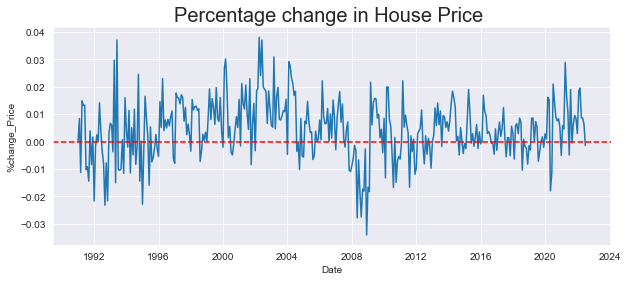

In [23]:
# plotting the percentage change in house prices
plt.figure(figsize = (10,4))
sns.lineplot(data=df_nationwide,x='Date',y='%change_Price')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in House Price ",fontdict={'fontsize': 20})
plt.show()

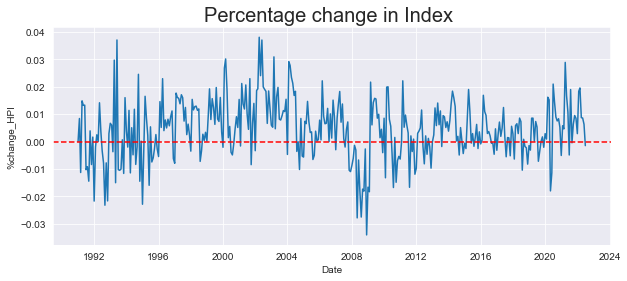

In [24]:
#plotting the percentage change in index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_nationwide,x='Date',y='%change_HPI')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in Index ",fontdict={'fontsize': 20})
plt.show()

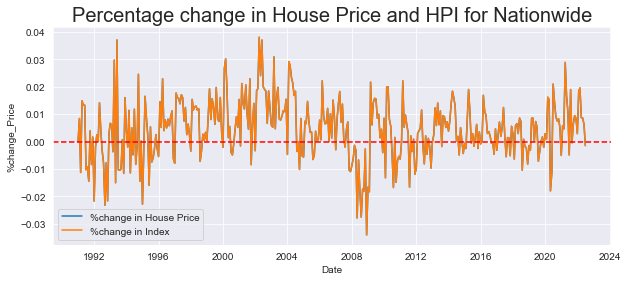

In [25]:
#plotting the percentage change together of both house price and Index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_nationwide,x='Date',y='%change_Price',label='%change in House Price')
sns.lineplot(data=df_nationwide,x='Date',y='%change_HPI',label='%change in Index')
plt.axhline(0, ls='--',c='red')
plt.legend()
plt.title("Percentage change in House Price and HPI for Nationwide",fontdict={'fontsize': 20})
plt.show()

#### LSL Acad E&W (Chartered Surveyors) House Price Data<a class="anchor" id="third-bullet"></a>

In [26]:
#reading the data
df_surveyors = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/e.surv-Acadata-EW-HPI-National-and-Regional-Formatted-Data-from-2005-April-22.xlsm',
                             sheet_name='DATA',usecols='D:F',nrows=217,header=8)
df_surveyors.head()

,Month,Average House Price,Index
0,2005-01-01,189930.269310,194.627352
1,2005-02-01,191085.625651,195.719519
2,2005-03-01,190886.853827,195.655161
3,2005-04-01,190951.982629,195.753681
4,2005-05-01,190420.781021,195.194145


In [27]:
##describing the dataset(checking the statistical information)
df_surveyors.describe()

,Average House Price,Index
count,208.000000,208.000000
mean,256548.743381,255.690249
std,48198.023179,40.076397
min,189930.269310,194.627352
25%,220525.584800,224.776352
50%,234265.686038,240.139593
75%,303664.547252,292.142244
max,372435.582968,356.248469


We can see : <br/> 1. The House Price Max is 372,435 and Min is 189,930 with a standard deviation of 48,198.02  and mean as 256,548.74<br/>2. Index Max is 356.24 and Min is 194.62 with a standard deviation of 40.07 and mean as 255.69

In [28]:
#checking for any null values
df_surveyors.isna().sum()

Month                   0
Average House Price     0
Index                   0
dtype: int64

In [29]:
#checking the dtypes of dataset
df_surveyors.dtypes

Month                   datetime64[ns]
Average House Price            float64
Index                          float64
dtype: object

In [30]:
#to check the date range  
date_list = list(df_surveyors['Month'])
print("The starting date of dataset is :",date_list[0])
print("The Ending date of dataset is :",date_list[-1])

The starting date of dataset is : 2005-01-01 00:00:00
The Ending date of dataset is : 2022-04-01 00:00:00


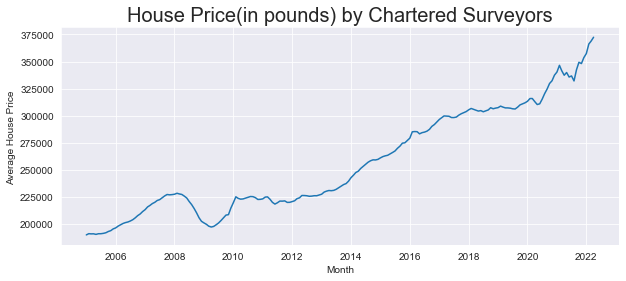

In [31]:
#Plotting the house price of nationwide
plt.figure(figsize = (10,4))
sns.lineplot(data = df_surveyors ,x='Month',y='Average House Price ')
plt.title("House Price(in pounds) by Chartered Surveyors",fontdict={'fontsize': 20})
plt.show()

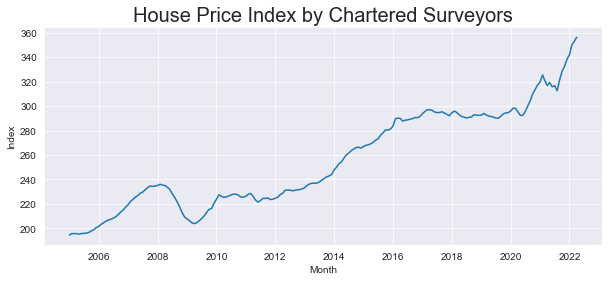

In [32]:
#Plotting the Index of Nationwide
plt.figure(figsize = (10,4))
sns.lineplot(data = df_surveyors ,x='Month',y='Index')
plt.title("House Price Index by Chartered Surveyors",fontdict={'fontsize': 20})
plt.show()

In [33]:
#calculating the percentage change in house price and index
df_surveyors['%change_HPI'] =df_surveyors['Index'].pct_change()
df_surveyors['%change_Price'] =df_surveyors['Average House Price '].pct_change()
df_surveyors.fillna(0,inplace=True)
df_surveyors.head()

,Month,Average House Price,Index,%change_HPI,%change_Price
0,2005-01-01,189930.269310,194.627352,0.000000,0.000000
1,2005-02-01,191085.625651,195.719519,0.005612,0.006083
2,2005-03-01,190886.853827,195.655161,-0.000329,-0.001040
3,2005-04-01,190951.982629,195.753681,0.000504,0.000341
4,2005-05-01,190420.781021,195.194145,-0.002858,-0.002782


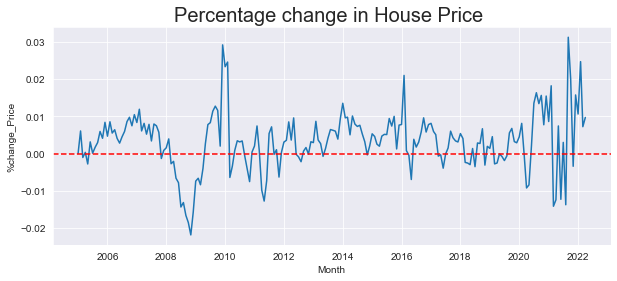

In [34]:
# plotting the percentage change in house prices
plt.figure(figsize = (10,4))
sns.lineplot(data=df_surveyors,x='Month',y='%change_Price')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in House Price ",fontdict={'fontsize': 20})
plt.show()

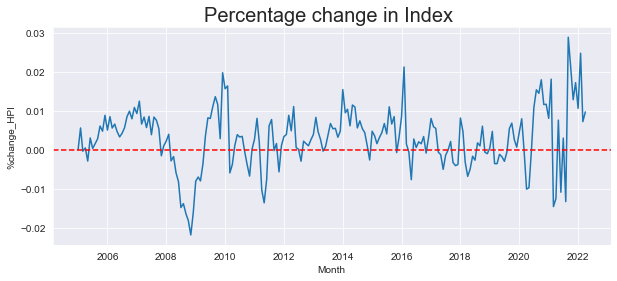

In [35]:
#plotting the percentage change in index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_surveyors,x='Month',y='%change_HPI')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in Index ",fontdict={'fontsize': 20})
plt.show()

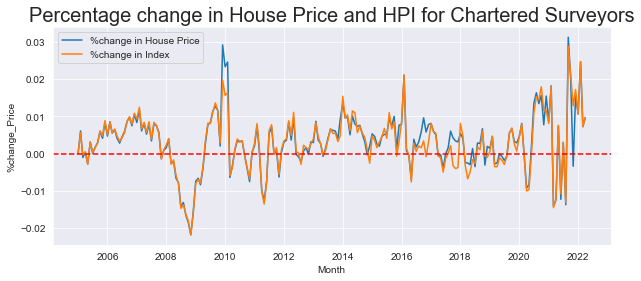

In [36]:
#plotting the percentage change together of both house price and Index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_surveyors,x='Month',y='%change_Price',label='%change in House Price')
sns.lineplot(data=df_surveyors,x='Month',y='%change_HPI',label='%change in Index')
plt.axhline(0, ls='--',c='red')
plt.legend()
plt.title("Percentage change in House Price and HPI for Chartered Surveyors",fontdict={'fontsize': 20})
plt.show()

#### Land Registry House Price Data<a class="anchor" id="forth-bullet"></a>

In [39]:
# importing the dataset for house prices
df_LR = pd.read_excel(r'C:/Users/hp/dissertation/Datasets/UK-HPI-full-file-2022-05_land_registry_1.xlsx')
df_LR.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,2004-01-02,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2004-01-03,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,2004-01-04,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,2004-01-05,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [40]:
#since the region_name contains all the regions, we would take the region_name as United Kingdom
df_LR = df_LR[df_LR.RegionName=='United Kingdom']
#we require only the date and average_price
df_LR = df_LR[['Date','Index','AveragePrice']]
df_LR.head()

,Date,Index,AveragePrice
120732,1968-01-04,1.885299,3594.602239
120733,1968-01-05,1.885299,3594.602239
120734,1968-01-06,1.885299,3594.602239
120735,1968-01-07,1.949207,3716.453163
120736,1968-01-08,1.949207,3716.453163


In [41]:
#describing the dataset(checking the statistical information)
df_LR.describe()

,Index,AveragePrice
count,650.000000,650.000000
mean,48.610337,92682.855832
std,41.736355,79576.598379
min,1.885299,3594.602239
25%,11.279839,21506.687970
50%,30.550845,58249.724790
75%,88.052504,167885.249350
max,148.688246,283496.357300


We can see : <br/>1. The House Price Max is 283,496 and Min is 3,594 with a standard deviation of 79576.59 and mean as 92682.85<br/>2. Index Max is 1.88 and Min is 148.68 with a standard deviation of 41.73 and mean as 48.61

In [42]:
#checking the data types of variables
df_LR.dtypes

Date            datetime64[ns]
Index                  float64
AveragePrice           float64
dtype: object

In [43]:
#converting the date object to different datetime format
df_LR['Date']=df_LR['Date'].astype('datetime64[ns]').dt.strftime('%Y-%d-%m')

In [44]:
#to check the date range  
date_list = list(df_LR['Date'])
print("The starting date of dataset is :",date_list[0])
print("The Ending date of dataset is :",date_list[-1])

The starting date of dataset is : 1968-04-01
The Ending date of dataset is : 2022-05-01


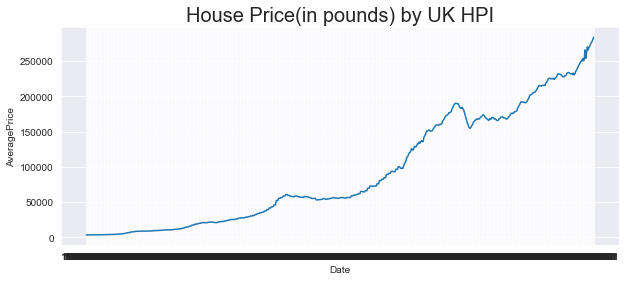

In [45]:
#Plotting the house price of Land Registry

plt.figure(figsize = (10,4))
sns.lineplot(data = df_LR ,x='Date',y='AveragePrice')
plt.title("House Price(in pounds) by UK HPI",fontdict={'fontsize': 20})
plt.show()


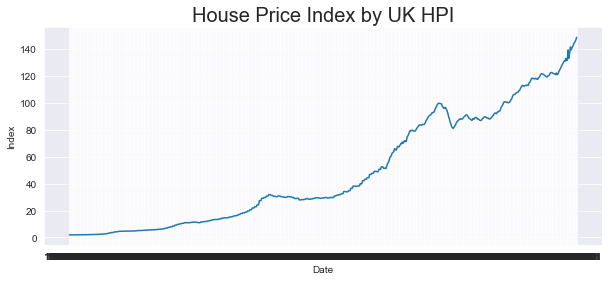

In [46]:
#Plotting the Index of Land Registry
plt.figure(figsize = (10,4))
sns.lineplot(data = df_LR ,x='Date',y='Index')
plt.title("House Price Index by UK HPI",fontdict={'fontsize': 20})
plt.show()


In [47]:
#calculating the percentage change in house price and index
df_LR['%change_HPI'] =df_LR['Index'].pct_change()
df_LR['%change_Price'] =df_LR['AveragePrice'].pct_change()
df_LR.fillna(0,inplace=True)
df_LR.head()

,Date,Index,AveragePrice,%change_HPI,%change_Price
120732,1968-04-01,1.885299,3594.602239,0.000000,0.000000
120733,1968-05-01,1.885299,3594.602239,0.000000,0.000000
120734,1968-06-01,1.885299,3594.602239,0.000000,0.000000
120735,1968-07-01,1.949207,3716.453163,0.033898,0.033898
120736,1968-08-01,1.949207,3716.453163,0.000000,0.000000


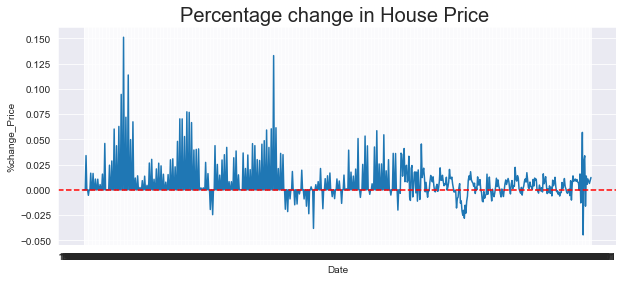

In [48]:
# plotting the percentage change in house prices
plt.figure(figsize = (10,4))
sns.lineplot(data=df_LR,x='Date',y='%change_Price')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in House Price ",fontdict={'fontsize': 20})
plt.show()


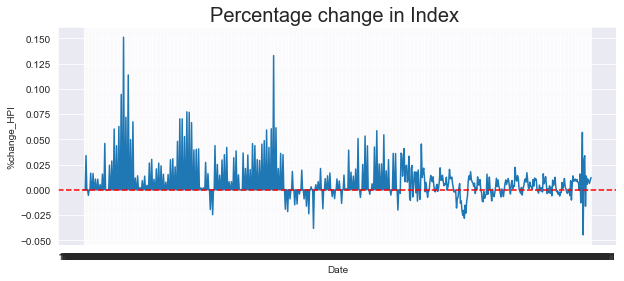

In [49]:
#plotting the percentage change in index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_LR,x='Date',y='%change_HPI')
plt.axhline(0, ls='--',c='red')
plt.title("Percentage change in Index ",fontdict={'fontsize': 20})
plt.show()


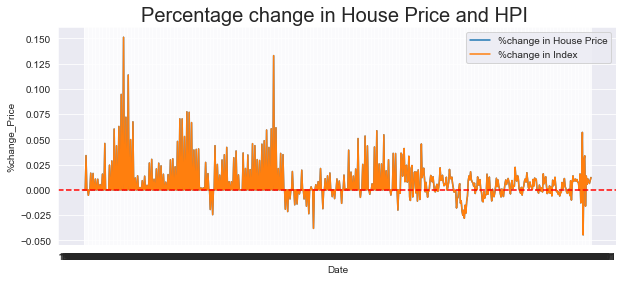

In [50]:
#plotting the percentage change together of both house price and Index
plt.figure(figsize = (10,4))
sns.lineplot(data=df_LR,x='Date',y='%change_Price',label='%change in House Price')
sns.lineplot(data=df_LR,x='Date',y='%change_HPI',label='%change in Index')
plt.axhline(0, ls='--',c='red')
plt.legend()
plt.title("Percentage change in House Price and HPI ",fontdict={'fontsize': 20})
plt.show()

#### Comparing all the indices together

In [51]:
#since the dates of the all datasets are different , thus , taking dates only from 2019 to 2022
START = '2019-01-01'
END = '2022-04-01'

In [52]:
# adding halifax data into the merged dataset
df_all = pd.DataFrame()
df_all[['Date','Halifax_Price','Halifax_Index','Halifax_%change_HPI','Halifax_%change_Price']] = df_halifax
df_all.set_index('Date',inplace=True)
df_all =  df_all.loc[START:END]
df_all.head()

,Halifax_Price,Halifax_Index,Halifax_%change_HPI,Halifax_%change_Price
Date,,,,
2019-01-01,223691,397.8,0.000000,0.000000
2019-02-01,236800,403.8,0.015083,0.058603
2019-03-01,233181,402.6,-0.002972,-0.015283
2019-04-01,236619,400.3,-0.005713,0.014744
2019-05-01,237837,399.7,-0.001499,0.005148


In [53]:
# adding the nationwide data into the merged dataset
temp =df_nationwide[(df_nationwide['Date']>=START) & (df_nationwide['Date']<=END)]
df_all[['Nationwide_Price','Nationwide_Index','Nationwide_%change_HPI','Nationwide_%change_Price']]=temp[['Average House Price','INDEX','%change_HPI','%change_Price']].values
df_all.head()

,Halifax_Price,Halifax_Index,Halifax_%change_HPI,Halifax_%change_Price,Nationwide_Price,Nationwide_Index,Nationwide_%change_HPI,Nationwide_%change_Price
Date,,,,,,,,
2019-01-01,223691,397.8,0.000000,0.000000,211966.181814,422.849868,-0.001485,-0.001485
2019-02-01,236800,403.8,0.015083,0.058603,211303.681381,421.528250,-0.003126,-0.003126
2019-03-01,233181,402.6,-0.002972,-0.015283,213102.320257,425.116343,0.008512,0.008512
2019-04-01,236619,400.3,-0.005713,0.014744,214919.604264,428.741630,0.008528,0.008528
2019-05-01,237837,399.7,-0.001499,0.005148,214945.636469,428.793561,0.000121,0.000121


In [54]:
# adding the LSL data into the merged dataset
temp =df_surveyors[(df_surveyors['Month']>=START) & (df_surveyors['Month']<=END)]
df_all[['LSL_Price','LSL_Index','LSL_%change_HPI','LSL_%change_Price']]=temp[['Average House Price ','Index','%change_HPI','%change_Price']].values
df_all.head()

,Halifax_Price,Halifax_Index,Halifax_%change_HPI,Halifax_%change_Price,Nationwide_Price,Nationwide_Index,Nationwide_%change_HPI,Nationwide_%change_Price,LSL_Price,LSL_Index,LSL_%change_HPI,LSL_%change_Price
Date,,,,,,,,,,,,
2019-01-01,223691,397.8,0.000000,0.000000,211966.181814,422.849868,-0.001485,-0.001485,307439.904620,292.518554,0.000520,0.001412
2019-02-01,236800,403.8,0.015083,0.058603,211303.681381,421.528250,-0.003126,-0.003126,308840.931142,293.900022,0.004723,0.004557
2019-03-01,233181,402.6,-0.002972,-0.015283,213102.320257,425.116343,0.008512,0.008512,307989.255158,292.870792,-0.003502,-0.002758
2019-04-01,236619,400.3,-0.005713,0.014744,214919.604264,428.741630,0.008528,0.008528,307211.011760,291.841148,-0.003516,-0.002527
2019-05-01,237837,399.7,-0.001499,0.005148,214945.636469,428.793561,0.000121,0.000121,307190.472067,291.512547,-0.001126,-0.000067


In [55]:
# adding the Land Registry data into the merged dataset
temp =df_LR[(df_LR['Date']>=START) & (df_LR['Date']<=END)]
df_all[['LR_Price','LR_Index','LR_%change_HPI','LR_%change_Price']]=temp[['AveragePrice','Index','%change_HPI','%change_Price']].values
df_all.head()

,Halifax_Price,Halifax_Index,Halifax_%change_HPI,Halifax_%change_Price,Nationwide_Price,Nationwide_Index,Nationwide_%change_HPI,Nationwide_%change_Price,LSL_Price,LSL_Index,LSL_%change_HPI,LSL_%change_Price,LR_Price,LR_Index,LR_%change_HPI,LR_%change_Price
Date,,,,,,,,,,,,,,,,
2019-01-01,223691,397.8,0.000000,0.000000,211966.181814,422.849868,-0.001485,-0.001485,307439.904620,292.518554,0.000520,0.001412,228314.4927,119.746447,-0.006158,-0.006158
2019-02-01,236800,403.8,0.015083,0.058603,211303.681381,421.528250,-0.003126,-0.003126,308840.931142,293.900022,0.004723,0.004557,227738.4642,119.444331,-0.002523,-0.002523
2019-03-01,233181,402.6,-0.002972,-0.015283,213102.320257,425.116343,0.008512,0.008512,307989.255158,292.870792,-0.003502,-0.002758,227103.9623,119.111547,-0.002786,-0.002786
2019-04-01,236619,400.3,-0.005713,0.014744,214919.604264,428.741630,0.008528,0.008528,307211.011760,291.841148,-0.003516,-0.002527,228749.3498,119.974521,0.007245,0.007245
2019-05-01,237837,399.7,-0.001499,0.005148,214945.636469,428.793561,0.000121,0.000121,307190.472067,291.512547,-0.001126,-0.000067,229061.1192,120.138038,0.001363,0.001363


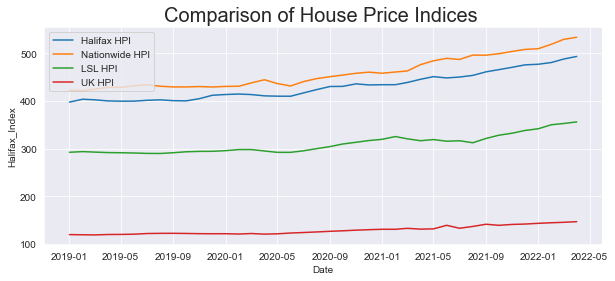

In [56]:
#plotting the house prices index by different companies together 

plt.figure(figsize = (10,4))
sns.lineplot(data = df_all ,x='Date',y='Halifax_Index', label ='Halifax HPI')
sns.lineplot(data = df_all ,x='Date',y='Nationwide_Index', label ='Nationwide HPI')
sns.lineplot(data = df_all ,x='Date',y='LSL_Index', label ='LSL HPI')
sns.lineplot(data = df_all ,x='Date',y='LR_Index', label ='UK HPI')
plt.title("Comparison of House Price Indices ",fontdict={'fontsize': 20})
plt.show()

We can see in the above chart that the UK HPI (Land Registry) is the lowest while Nationwide HPI is the highest

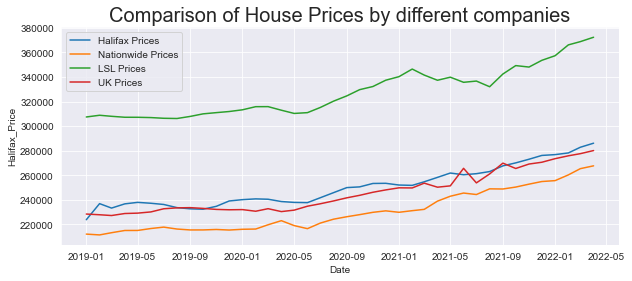

In [57]:
#plotting the house prices by different companies together 
plt.figure(figsize = (10,4))
sns.lineplot(data = df_all ,x='Date',y='Halifax_Price', label ='Halifax Prices')
sns.lineplot(data = df_all ,x='Date',y='Nationwide_Price', label ='Nationwide Prices')
sns.lineplot(data = df_all ,x='Date',y='LSL_Price', label ='LSL Prices')
sns.lineplot(data = df_all ,x='Date',y='LR_Price', label ='UK Prices')
plt.title("Comparison of House Prices by different companies",fontdict={'fontsize': 20})
plt.show()

We can see in the above chart that the LSL Prices(Land Surveyors) is the highest while Nationwide HPI is the lowest.

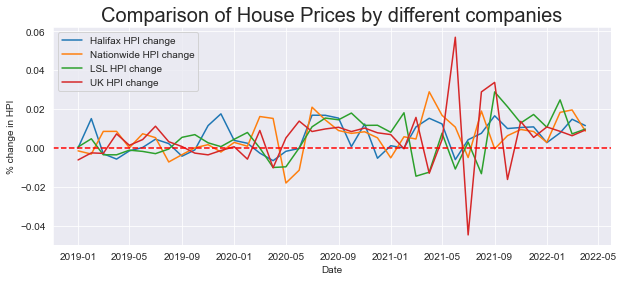

In [58]:
#plotting the %change in HPI 
plt.figure(figsize = (10,4))
sns.lineplot(data = df_all ,x='Date',y='Halifax_%change_HPI', label ='Halifax HPI change')
sns.lineplot(data = df_all ,x='Date',y='Nationwide_%change_HPI', label ='Nationwide HPI change')
sns.lineplot(data = df_all ,x='Date',y='LSL_%change_HPI', label ='LSL HPI change')
sns.lineplot(data = df_all ,x='Date',y='LR_%change_HPI', label ='UK HPI change')
plt.axhline(0, ls='--',c='red')
plt.xlabel("Date")
plt.ylabel("% change in HPI")
plt.title("Comparison of House Prices by different companies",fontdict={'fontsize': 20})
plt.show()

We can see there is a huge % fluctuation in UK HPI , during year 2021, may be it is due to COVID-19 situation. Moreover , we can see that fluctuation for all indices is around 0.02 

In [59]:
# calculating the average house prices from year 2019
mean_halifax = df_all['Halifax_Price'].mean()
print("Average House Price by Halifax",mean_halifax)
mean_nationwide = df_all['Nationwide_Price'].mean()
print("Average House Price by Nationwide",mean_nationwide)
mean_LSL = df_all['LSL_Price'].mean()
print("Average House Price by LSL",mean_LSL)
mean_LR = df_all['LR_Price'].mean()
print("Average House Price by Land Registry",mean_LR)

Average House Price by Halifax 250395.425
Average House Price by Nationwide 230402.65679764157
Average House Price by LSL 327657.8222333012
Average House Price by Land Registry 245757.55771499994


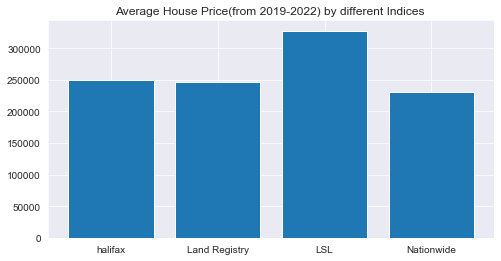

In [60]:
ind_name = ['halifax','Land Registry','LSL','Nationwide']
ind_lst = [mean_halifax,mean_LR,mean_LSL,mean_nationwide]
plt.figure(figsize = (8,4))
plt.bar(ind_name,ind_lst)
plt.title("Average House Price(from 2019-2022) by different Indices ")
plt.show()

we can see in the above chart that the average house prices is the highest in LSL whereas lowest in Nationwide

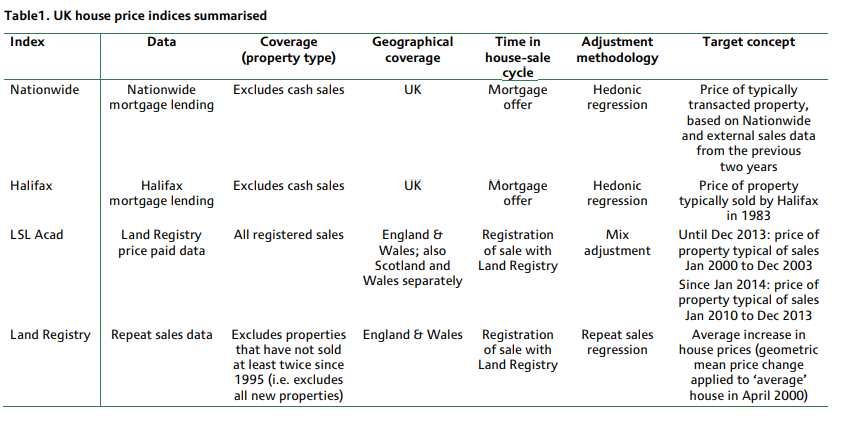

Source : https://ifs.org.uk/bns/bn146.pdf